# Histograms
### - Grayscale Histograms, Color Histograms, Histogram Equalization, Histogram and Masks
### Import the necessary packages

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# 1. Grayscale Histogram

### Load the image, convert it to grayscale, and show it

Text(0.5,1,'Gray')

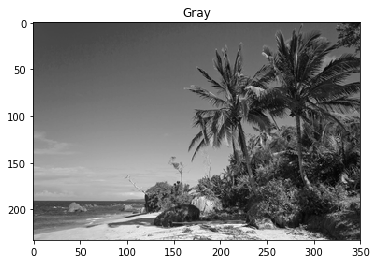

In [2]:
image = cv2.imread("images/image2.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Gray')

### Construct a grayscale histogram

In [3]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

### Plot the histogram

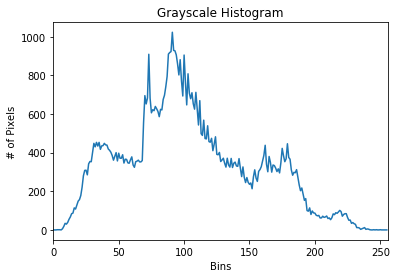

In [4]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

# 2. Color Histograms 

### Grab the image channels, initialize the tuple of colors and the figure

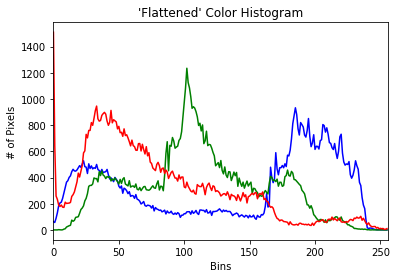

In [5]:
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# Loop over the image channels

for (chan, color) in zip(chans, colors):
    # Create a histogram for the current channel and plot it
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

### Let's move on to 2D histograms

-- I am reducing the number of bins in the histogram from 256 to 32 so we can better visualize the results

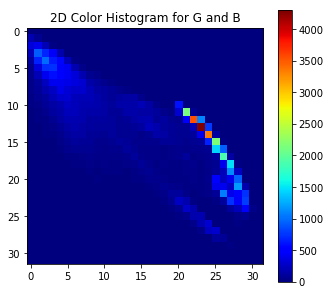

In [6]:
fig = plt.figure(figsize=(18,5))

# Plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest", cmap=plt.cm.jet)
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

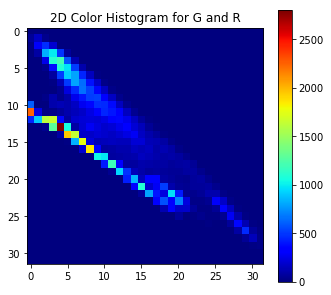

In [7]:
# Plot a 2D color histogram for green and red
fig = plt.figure(figsize=(18,5))

ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest", cmap=plt.cm.jet)
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

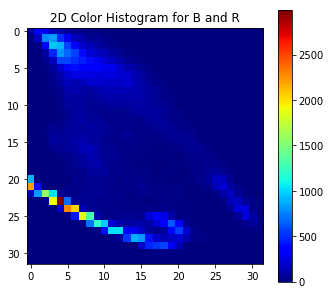

In [8]:
# Plot a 2D color histogram for blue and red
fig = plt.figure(figsize=(18,5))

ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None,
    [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest", cmap=plt.cm.jet)
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

# 3. Histogram Equalization

### Apply histogram equalization to stretch the constrast of our Gray image

In [9]:
eq = cv2.equalizeHist(gray)

### Show our images -- notice how the constrast of the second image has been stretched

Text(0.5,1,'Histogram Equalization (Before and After)')

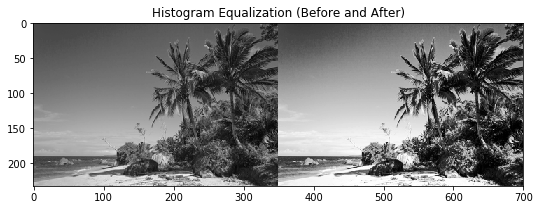

In [10]:
plt.figure(figsize=(20,3))
plt.imshow(np.hstack([gray, eq]), cmap='gray')
plt.title('Histogram Equalization (Before and After)')

# 4. Histogram and Masks

In [11]:
def plot_histogram(image, title, mask = None):
    # Grab the image channels, initialize the tuple of colors
    # and the figure
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")

    # Loop over the image channels
    for (chan, color) in zip(chans, colors):
        # Create a histogram for the current channel and plot it
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color = color)
        plt.xlim([0, 256])

### Construct the argument parser and parse the arguments

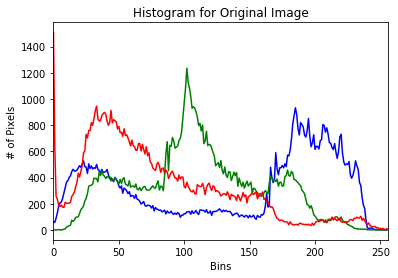

In [12]:
# Plot a histogram using the above method
plot_histogram(image, "Histogram for Original Image")

Construct a mask for our image -- our mask will be BLACK for regions we want to IGNORE and WHITE for regions we want to EXAMINE. 

In this example we will be examining the foliage of the image, so we'll draw a white rectangle where the foliage is.

Text(0.5,1,'Mask')

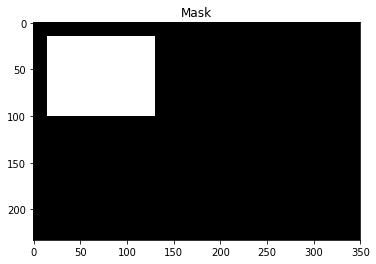

In [13]:
mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.rectangle(mask, (15, 15), (130, 100), (255,255,255), -1)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

### What does masking our image look like?

Text(0.5,1,'Applying the Mask')

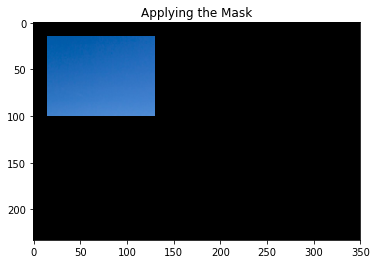

In [14]:
masked = cv2.bitwise_and(image, image, mask = mask)
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
plt.title("Applying the Mask")

### Let's compute a histogram for our image, but we'll only include pixels in the masked region

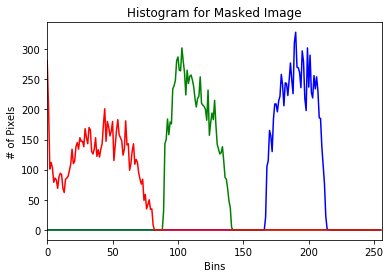

In [15]:
plot_histogram(image, "Histogram for Masked Image", mask = mask)